In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Одномерная функция

Определим одномерную функцию ${f(x)}$ и ее производную, вычисленную аналитически:

In [2]:
def f(x):
    return -0.5*x**3 - 3*x**2 - 5*x + 3

def f_deriv(x):
    return -1.5*x**2 - 6*x - 5

Рассмотрим метод
__[numpy.gradient](https://numpy.org/doc/2.0/reference/generated/numpy.gradient.html#numpy-gradient)__
на примере массива небольшого размера.
В одномерном случае результатом является массив значений производной в каждой точке входного массива.
Вычисления привязаны к шагу аргумента дифференцируемой функции. В случае постоянного шага имеется возможность задавать его одной константой.

In [3]:
N_point_grad = [2, 3, 4, 5]
for n in N_point_grad:
    x = np.linspace(0, 0.1, n)
    x_step = x[1] - x[0]
    y = f(x)
    print('Number of points:', n)
    print('numpy.gradient:', np.gradient(y, x_step))
    print('Derivative:', f_deriv(x))


Number of points: 2
numpy.gradient: [-5.305 -5.305]
Derivative: [-5.    -5.615]
Number of points: 3
numpy.gradient: [-5.15125 -5.305   -5.45875]
Derivative: [-5.      -5.30375 -5.615  ]
Number of points: 4
numpy.gradient: [-5.10055556 -5.20222222 -5.40722222 -5.51055556]
Derivative: [-5.         -5.20166667 -5.40666667 -5.615     ]
Number of points: 5
numpy.gradient: [-5.0753125 -5.15125   -5.3040625 -5.45875   -5.5365625]
Derivative: [-5.        -5.1509375 -5.30375   -5.4584375 -5.615    ]


Анализируя результаты можно сделать следующие выводы:
- Крайние точки в массиве градиента отличаются значительно от точного значения производной. Массив из 2х точек недопустим.
- Приминительно к задачи нахождения градиента в точке оптимальный размер массива: 3. При этом, набольшая точность у второго с конца значения.

Визуализируем значения градиента и производной:

<function matplotlib.pyplot.show(close=None, block=None)>

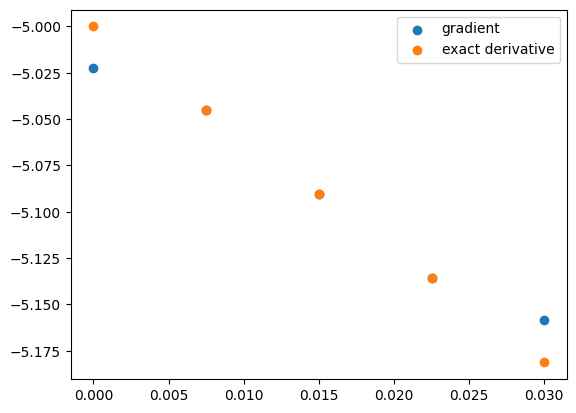

In [4]:
x = np.linspace(0, 0.03, 5)
x_step = x[1] - x[0]
plt.scatter(x, np.gradient(f(x), x_step))
plt.scatter(x, f_deriv(x))
plt.legend(['gradient', 'exact derivative'])
plt.show

# Многомерная функция

In [5]:
from functions.functions_under_study import f_well, f_poor, f_rozen, grad_well, grad_poor, grad_rozen

In [81]:
# Инициализируем искомые значения.
w_coeff_1 = np.array([-2.2,-1.1])
# Принимаем шаг в 5% относительно начального приближения и вводим соответствующие приращения.
w_coeff = 0.95 * w_coeff_1
w_coeff_2 = 1.05 * w_coeff_1
# Массивы для каждой переменной отдельно.
x1 = [w_coeff[0], w_coeff_1[0], w_coeff_2[0]]
x2 = [w_coeff[1], w_coeff_1[1], w_coeff_2[1]]
# Конвертируем в сетку.
X1, X2 = np.meshgrid(x1, x2)
print('Переменная 1:\n', np.round(x1,2))
print('Переменная 2:\n', np.round(x2,2))
print('Сетка по переменной 1:\n', np.round(X1,2))
print('Сетка по переменной 2:\n', np.round(X2,2))

Переменная 1:
 [-2.09 -2.2  -2.31]
Переменная 2:
 [-1.04 -1.1  -1.16]
Сетка по переменной 1:
 [[-2.09 -2.2  -2.31]
 [-2.09 -2.2  -2.31]
 [-2.09 -2.2  -2.31]]
Сетка по переменной 2:
 [[-1.04 -1.04 -1.04]
 [-1.1  -1.1  -1.1 ]
 [-1.16 -1.16 -1.16]]


Таблица значений функции на сетке.

In [82]:
# ВАЖНО! Переменные перечисляем в ПРЯМОМ порядке.
loss_func_grad = f_rozen([X1,X2])

Градиент функции в точках сетки (численное дифференцирование).

In [83]:
# ВАЖНО! Переменные перечисляем в ОБРАТНОМ порядке.
grad = np.gradient(loss_func_grad, x2, x1)

Градиент по явнозаданной функции.

In [84]:
grad_manual = grad_rozen([X1,X2])

Сравниваем значения градиента.

In [85]:
print('Переменная 1:\n', np.round(grad[0],2), '\n', np.round(grad_manual[1],2))
print('Переменная 2:\n', np.round(grad[1],2), '\n', np.round(grad_manual[0],2))

Переменная 1:
 [[-1088.12 -1182.5  -1281.72]
 [-1093.62 -1188.   -1287.22]
 [-1099.12 -1193.5  -1292.72]] 
 [[-1082.62 -1177.   -1276.22]
 [-1093.62 -1188.   -1287.22]
 [-1104.62 -1199.   -1298.22]]
Переменная 2:
 [[-4853.17 -5195.85 -5538.52]
 [-4900.36 -5244.25 -5588.13]
 [-4947.55 -5292.65 -5637.74]] 
 [[-4531.53 -5185.2  -5902.76]
 [-4577.51 -5233.6  -5953.58]
 [-4623.49 -5282.   -6004.4 ]]


Выбираем значение в центре окрестности точки.

In [86]:
print('Переменная 1:\n', np.round(grad[0][1,1],2), np.round(grad_manual[1][1,1],2))
print('Переменная 2:\n', np.round(grad[1][1,1],2), np.round(grad_manual[0][1,1],2))

Переменная 1:
 -1188.0 -1188.0
Переменная 2:
 -5244.25 -5233.6
